<a href="https://colab.research.google.com/github/vithal-4u/Machine_Learning/blob/master/textClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -q tf_nightly

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras

import numpy as np

print(tf.__version__)

imdb = keras.datasets.imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [0]:
print("Training entries: {}, labels: {}".format(len(train_data), len(train_labels)))

word_index = imdb.get_word_index()
print(word_index)

In [0]:
for k,v in word_index.items():
  print(k,v)

In [0]:
# A dictionary mapping words to an integer index
word_index = imdb.get_word_index()

# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()}

word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

#print(word_index)
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

#print(reverse_word_index)

def decode_review(text):
  print(text)
  return ' '.join([reverse_word_index.get(i, '?') for i in text])

decode_review(train_data[0])

train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)
len(train_data[0]), len(train_data[1])

In [0]:
vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.summary()

In [0]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

In [0]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [31]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 1s 66us/sample - loss: 0.0104 - acc: 0.9991 - val_loss: 0.5968 - val_acc: 0.8629
Epoch 2/40
15000/15000 [==============================] - 1s 67us/sample - loss: 0.0097 - acc: 0.9996 - val_loss: 0.6008 - val_acc: 0.8625
Epoch 3/40
15000/15000 [==============================] - 1s 67us/sample - loss: 0.0095 - acc: 0.9997 - val_loss: 0.6059 - val_acc: 0.8628
Epoch 4/40
15000/15000 [==============================] - 1s 68us/sample - loss: 0.0090 - acc: 0.9997 - val_loss: 0.6111 - val_acc: 0.8621
Epoch 5/40
15000/15000 [==============================] - 1s 68us/sample - loss: 0.0086 - acc: 0.9997 - val_loss: 0.6152 - val_acc: 0.8627
Epoch 6/40
15000/15000 [==============================] - 1s 68us/sample - loss: 0.0082 - acc: 0.9997 - val_loss: 0.6215 - val_acc: 0.8617
Epoch 7/40
15000/15000 [==============================] - 1s 67us/sample - loss: 0.0079 - acc: 0.9997 - val_loss: 0.

In [32]:
results = model.evaluate(test_data, test_labels)
print(results)

25000/25000 [==============================] - 1s 36us/sample - loss: 0.8247 - acc: 0.8466
[0.8246550693893433, 0.84664]


In [33]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [39]:
import matplotlib.pyplot as plt

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

print(len(acc))
print(val_acc)
print(loss)
print(val_loss)

40
[0.8629, 0.8625, 0.8628, 0.8621, 0.8627, 0.8617, 0.8616, 0.8623, 0.8618, 0.8615, 0.8615, 0.8615, 0.8618, 0.8612, 0.862, 0.861, 0.8607, 0.8606, 0.861, 0.8613, 0.8611, 0.8611, 0.8607, 0.8611, 0.8604, 0.8611, 0.8609, 0.8604, 0.8603, 0.8606, 0.8601, 0.8606, 0.8603, 0.8605, 0.8602, 0.8602, 0.8603, 0.8599, 0.8599, 0.8592]
[0.010447295538087686, 0.00968147135178248, 0.00948752474958698, 0.009031855667134126, 0.00861736540744702, 0.008242252078652382, 0.00791332141260306, 0.00746058987006545, 0.007088536589841048, 0.0068939129079381625, 0.006580227073778709, 0.006304546249409517, 0.0060526737133661905, 0.005836844570438067, 0.005951303838565946, 0.005487990449865659, 0.005257930009563764, 0.005071248390277227, 0.004908337103823821, 0.0047060978971421715, 0.00455478115255634, 0.004394603848954042, 0.004224293178319931, 0.004119274087746938, 0.003975830418989063, 0.0038200763943915567, 0.0036803516345719498, 0.003622233833372593, 0.0034670952099064988, 0.0034045418272415796, 0.003333695597325

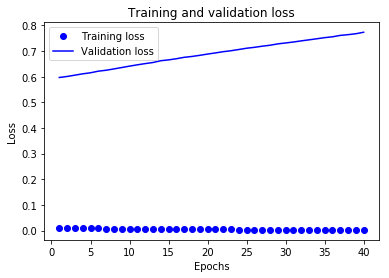

In [35]:
epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

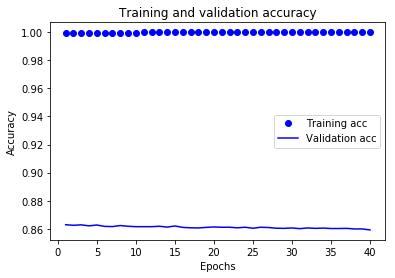

In [40]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()